## Introduction Building Autoencoders

"Autoencoding" is a familiar term in data compression field where the compression and decompression functions are data-specific, lossy, learned automatically from examples rather than engineered by a human.

1) Autoencoders are data-specific,  they can compress data similar to what they have been trained on. 

2) Autoencoders's outputs can be degraded compared to the original inputs (similar to MP3 or JPEG compression) (loss)

3) Autoencoders are learned automatically from data examples, which is a useful property

Three things are play core role in an autoencoder: an encoding function, a decoding function, and a distance function between the amount of information loss between the compressed representation of your data and the decompressed representation (i.e. a "loss" function).

Two interesting practical applications of autoencoders are data denoising, and dimensionality reduction for data visualization.



### import Keras

In [11]:
from keras.layers import Input, Dense
from keras.models import Model

### create full connected layer for encoder and decoder

In [12]:
# 32 size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

### create encoder and decoder

In [13]:
autoencoder = Model(input_img, decoded)


encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

### configure our model with loss and optimizer

In [14]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

### load Mnist data


In [15]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


### train our model 


In [16]:
autoencoder.fit(x_train, x_train,
                epochs=1,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 7s - loss: 0.3709 - val_loss: 0.2715

### Show result

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


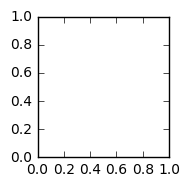

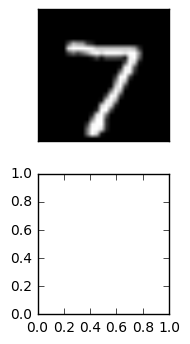

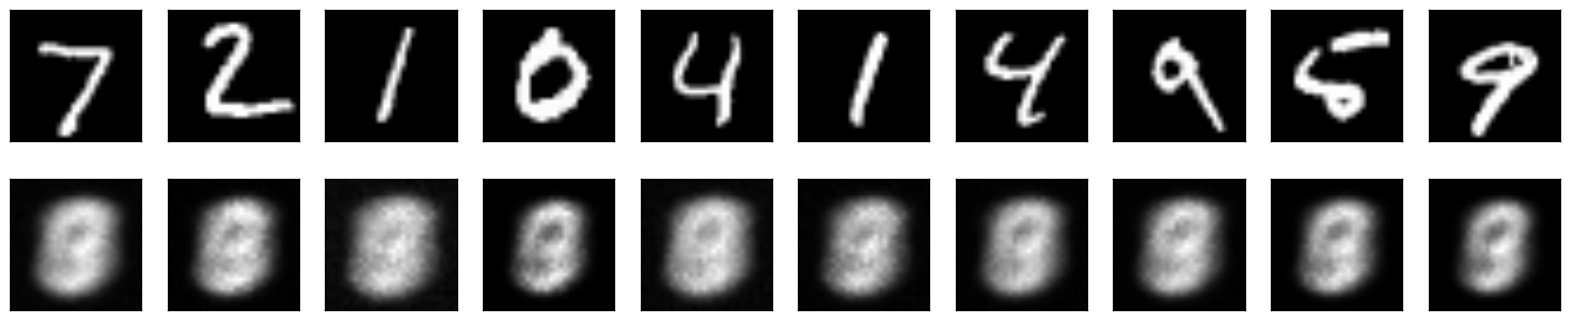

In [17]:
autoencoder.summary()

import matplotlib.pyplot as plt

n = 10  # digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## task1: insert more dense layer into model and train model again